In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from joblib import dump

In [2]:
# Reading the insurance dataset
df = pd.read_csv('Data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Encoding features to numeric values
encoder = LabelEncoder()

to_be_encoded = ['sex', 'smoker', 'region']

for feature in to_be_encoded:
    df[feature] = encoder.fit_transform(df[feature])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

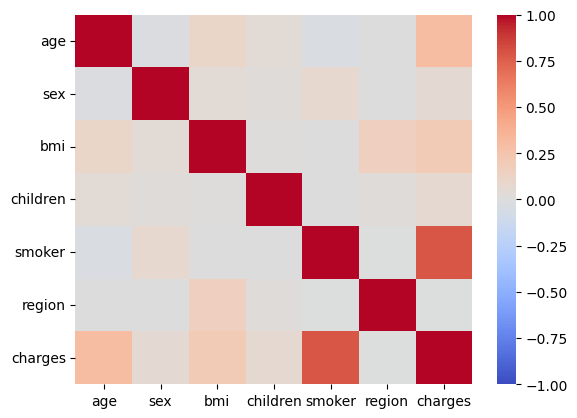

In [5]:
# Build a correlation matrix and plot the heatmap to identify important fields
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

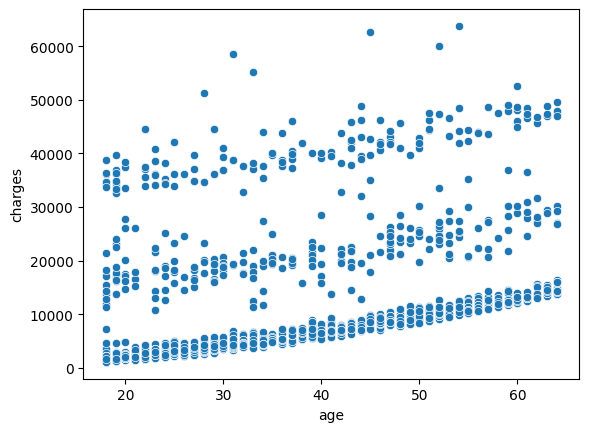

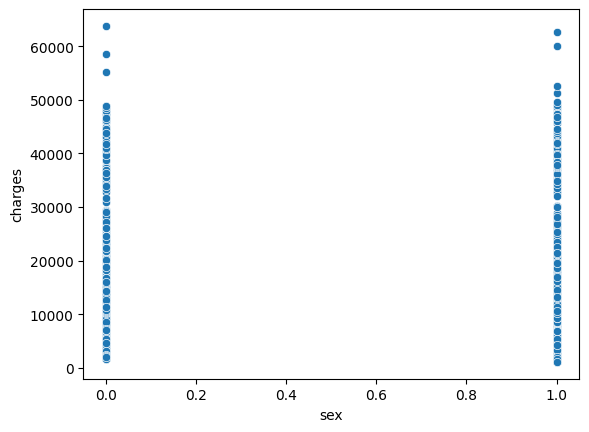

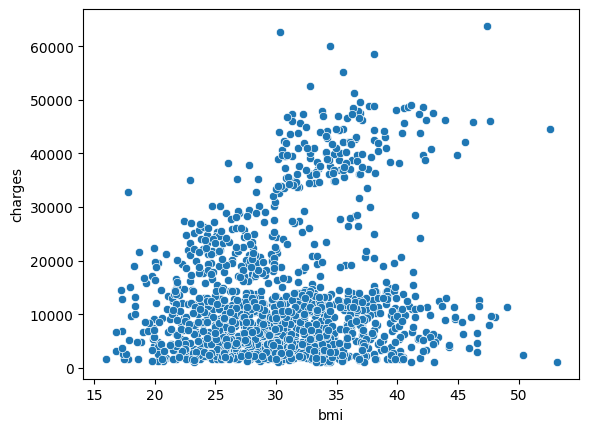

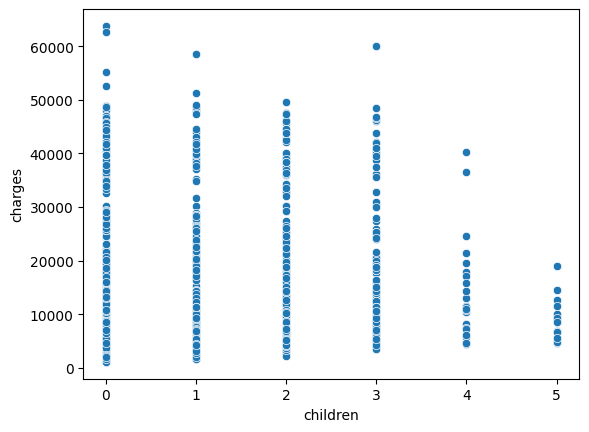

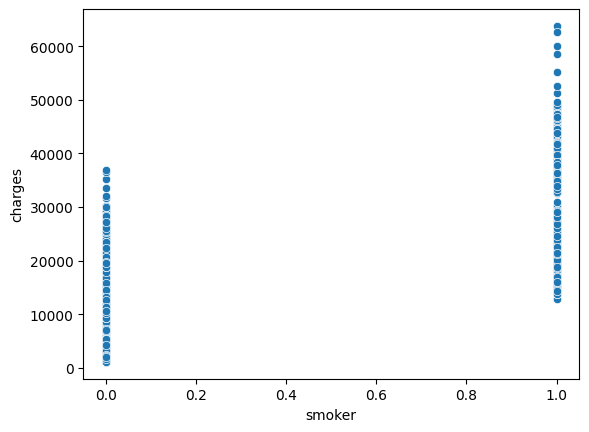

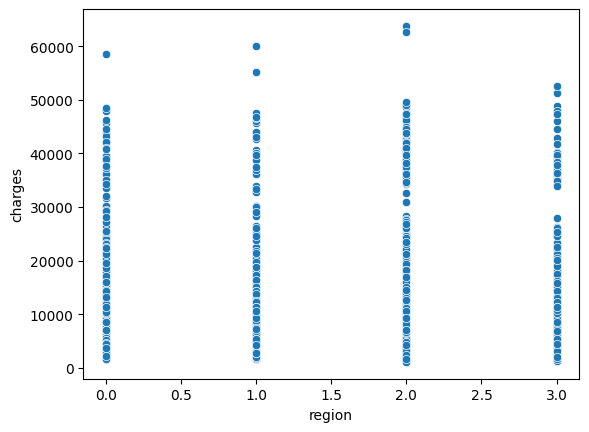

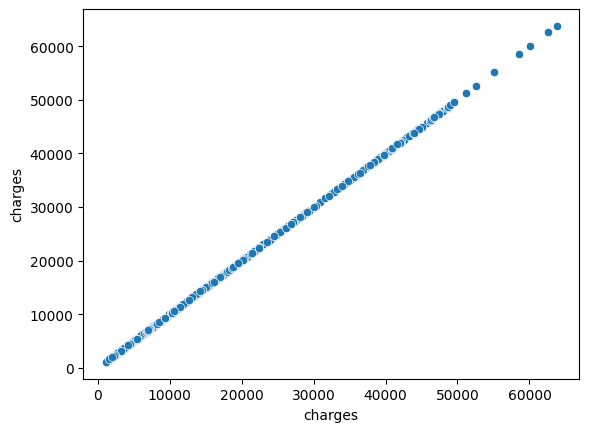

In [8]:
# Visualising the trend of different features against charges
for feature in df.columns:
    sns.scatterplot(x=df[feature], y=df.charges)
    plt.show()

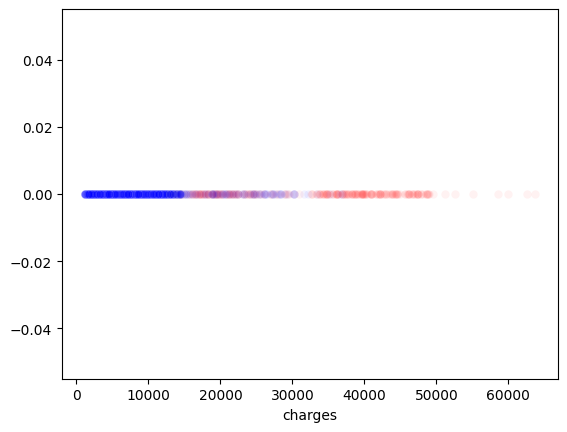

In [34]:
# More specifically visualising the distrinction in charges between smokers and non-smokers
colors = {1: 'red', 0: 'blue'}

for category, color in colors.items():
    df_category = df[df['smoker'] == category]
    sns.scatterplot(x=df_category['charges'], y=0, color=color, alpha=0.05)

plt.show()

In [44]:
# Chose the following features as the most important in affecting the insurance charge
X_features = ['age', 'smoker', 'bmi', 'children']

# Created a dataset based on said features
X = df[X_features]

# Set Y as target
Y = df.charges

# Scale x to make it easier to train on
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [45]:
# Created a new instance of the model
lr_model = LinearRegression()

# Trained the model
lr_model.fit(X_train, Y_train)

LinearRegression()

In [46]:
# Made predictions with model
Y_pred = lr_model.predict(X_test)

In [47]:
# Evaluated model using mean_absolute_error
mae = mean_absolute_error(Y_pred, Y_test)
mae

np.float64(4213.798594527248)

In [48]:
# Evaluated the model using the r-squared score
lr_model.score(X_test, Y_test)

0.7811147722517887

In [49]:
# Listed once more the features the model relies on
X.columns

Index(['age', 'smoker', 'bmi', 'children'], dtype='object')

In [50]:
# Dump model in API folder
dump(lr_model, '../API/multivariate_model.joblib')

['../API/multivariate_model.joblib']

In [51]:
# Dump scaler in API folder
dump(scaler, '../API/multivariate_scaler.joblib')

['../API/multivariate_scaler.joblib']